In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

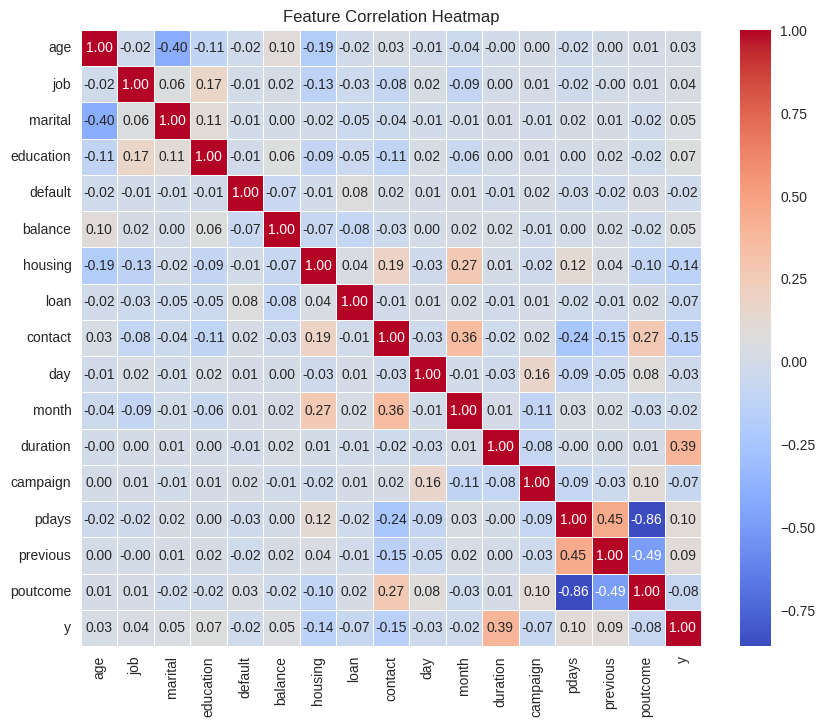

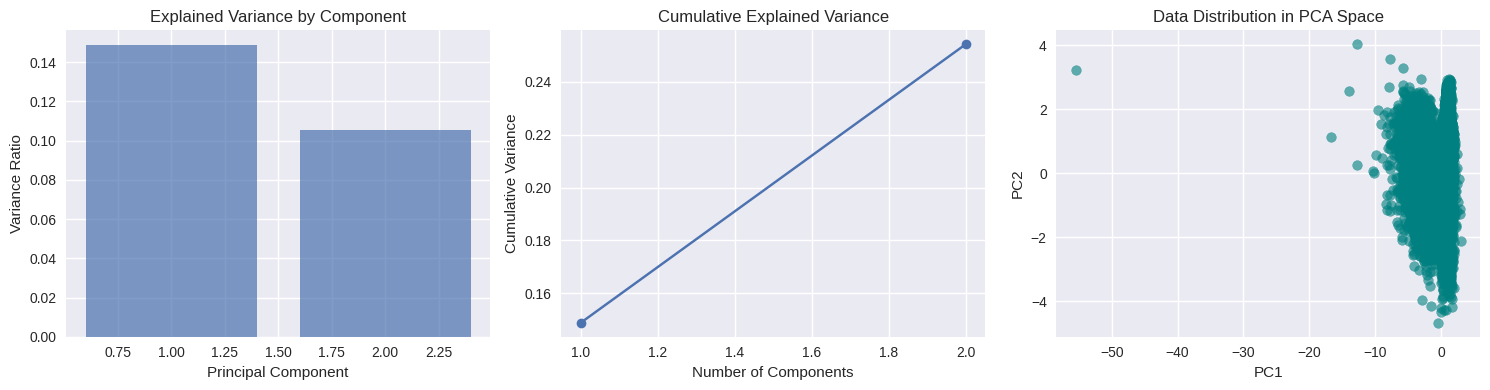

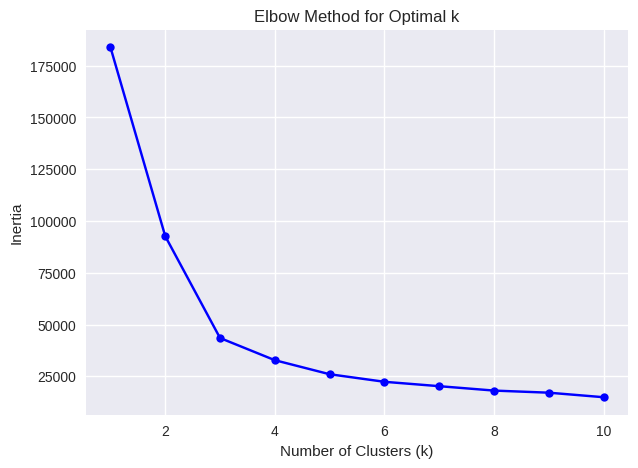

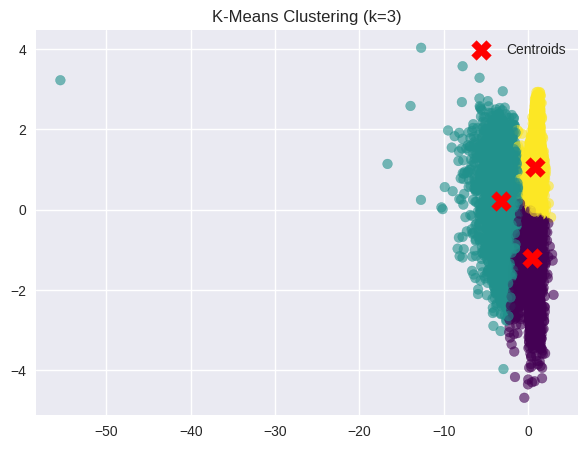

In [ ]:
#==================== FOR DATA LOADING AND PREPROCESSING ====================#
def load_data(filepath):
    """Load and preprocess the dataset for clustering and show correlation heatmap."""
    # Load CSV (semicolon-separated)
    df = pd.read_csv(filepath, sep=';')

    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Apply Label Encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # Select all features except target (if 'y' exists, keep for reference)
    if 'y' in df.columns:
        X = df.drop('y', axis=1)
    else:
        X = df.copy()

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
    plt.title('Feature Correlation Heatmap')
    plt.show()

    return X_scaled, df


#==================== FOR PCA DIMENSIONALITY REDUCTION ====================#
def apply_pca(x, n_components=2):
    """Apply PCA for dimensionality reduction and visualize explained variance + PCA space."""
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(x)

    # Explained variance data
    explained_var = pca.explained_variance_ratio_
    cumulative_var = np.cumsum(explained_var)

    plt.figure(figsize=(15, 4))

    # Plot explained variance ratio
    plt.subplot(1, 3, 1)
    plt.bar(range(1, n_components + 1), explained_var, alpha=0.7)
    plt.title('Explained Variance by Component')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')

    # Plot cumulative explained variance
    plt.subplot(1, 3, 2)
    plt.plot(range(1, n_components + 1), cumulative_var, marker='o')
    plt.title('Cumulative Explained Variance')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance')

    # Plot PCA 2D scatter
    plt.subplot(1, 3, 3)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, color='teal')
    plt.title('Data Distribution in PCA Space')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.tight_layout()
    plt.show()

    return X_pca


#==================== FOR K-MEANS ====================#
def find_optimal_clusters(x, max_clusters=10):
    """Find optimal number of clusters using the Elbow Method."""
    inertias = []
    K = range(1, max_clusters + 1)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(x)
        inertias.append(kmeans.inertia_)

    # Elbow Plot
    plt.figure(figsize=(7, 5))
    plt.plot(K, inertias, 'bo-', markersize=6)
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

    return inertias


def perform_kmeans_clustering(x, n_clusters=3):
    """Perform K-Means clustering and show cluster scatter with centroids."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(x)

    plt.figure(figsize=(7, 5))
    plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-Means Clustering (k={n_clusters})')
    plt.legend()
    plt.show()

    return labels, kmeans


#==================== FOR AGGLOMERATIVE CLUSTERING ====================#
def perform_agglomerative_clustering(x, n_clusters=3):
    """Perform Agglomerative Clustering and visualize cluster distribution."""
    agglom = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglom.fit_predict(x)

    plt.figure(figsize=(7, 5))
    plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='plasma', alpha=0.6)
    plt.title(f'Agglomerative Clustering (k={n_clusters})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

    return labels, agglom


#==================== FOR DENDROGRAM ====================#
def get_linkages(x):
    """Compute linkage matrix for dendrogram visualization."""
    linked = linkage(x, method='ward')
    return linked


def plot_dendrogram(linked):
    """Plot the hierarchical clustering dendrogram."""
    plt.figure(figsize=(12, 6))
    dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=45, leaf_font_size=10)
    plt.title('Dendrogram for Hierarchical Clustering')
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean Distance')
    plt.show()

#==================== RUN THE FULL PIPELINE ====================#

# 1. Load and preprocess data
X_scaled, df = load_data('/content/bank-full.csv')

# 2. Apply PCA for dimensionality reduction (2D for visualization)
X_pca = apply_pca(X_scaled, n_components=2)

# 3. Find optimal clusters using Elbow Method
inertias = find_optimal_clusters(X_pca, max_clusters=10)

# 4. Perform K-Means clustering (use k=3 if elbow suggests 3)
labels_kmeans, kmeans_model = perform_kmeans_clustering(X_pca, n_clusters=3)

# 5. Perform Agglomerative clustering (use same k)
labels_agglom, agglom_model = perform_agglomerative_clustering(X_pca, n_clusters=3)

# 6. Compute linkage matrix and plot dendrogram
linked = get_linkages(X_pca)
plot_dendrogram(linked)


## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [ ]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Load data
    df = pd.read_csv(filepath, sep=';')  # Loaded CSV with semicolon separator

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # Applied label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features]  # Selected features

    # Scaled the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('/content/bank-full.csv')
print("Data shape:", X_scaled.shape)


Data shape: (45211, 9)


In [ ]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centroids = X[indices]  # selected distinct points as centroids
        return centroids

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)  # assigned nearest centroid
        return labels

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        new_centroids = []
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids.append(cluster_points.mean(axis=0))  # mean of cluster points
            else:
                new_centroids.append(self.centroids[i])  # unchanged if no points assigned
        return np.array(new_centroids)

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)

            # check for convergence
            if np.allclose(self.centroids, new_centroids, atol=1e-6):
                break
            self.centroids = new_centroids

        self.labels = labels
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

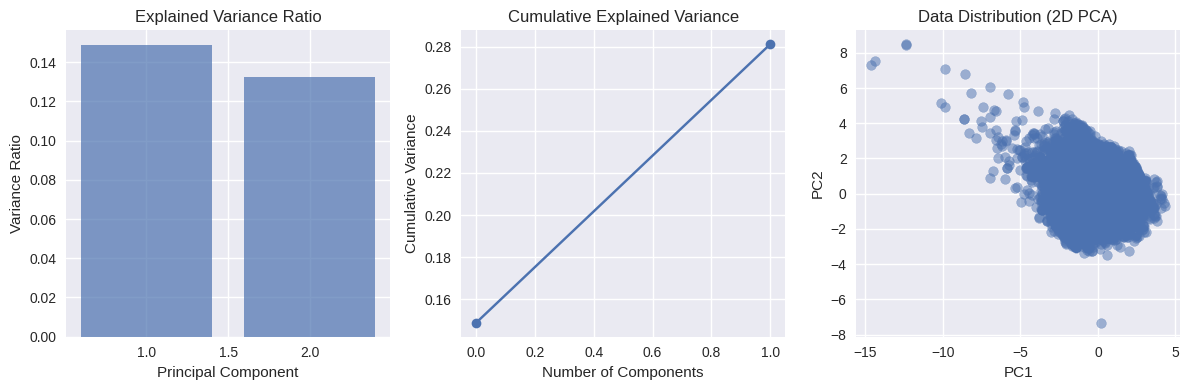

Shape after PCA: (45211, 2)


In [ ]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Initialize and fit PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Created visualizations
    plt.figure(figsize=(12, 4))

    # Plot explained variance ratio
    plt.subplot(1, 3, 1)
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, alpha=0.7)
    plt.title('Explained Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')

    # Plot cumulative explained variance
    plt.subplot(1, 3, 2)
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.title('Cumulative Explained Variance')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance')

    # Plot data distribution in 2D
    plt.subplot(1, 3, 3)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    plt.title('Data Distribution (2D PCA)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.tight_layout()
    plt.show()

    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)


## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

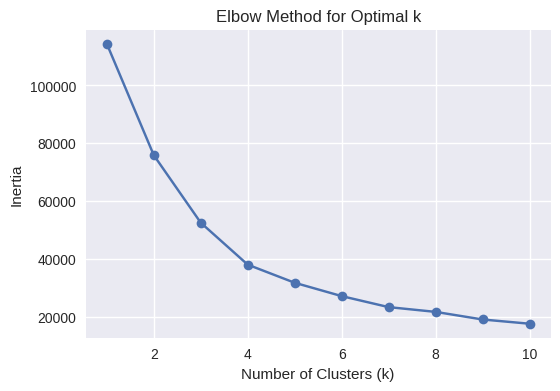

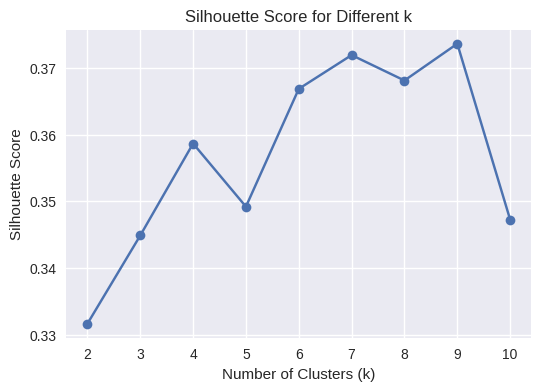

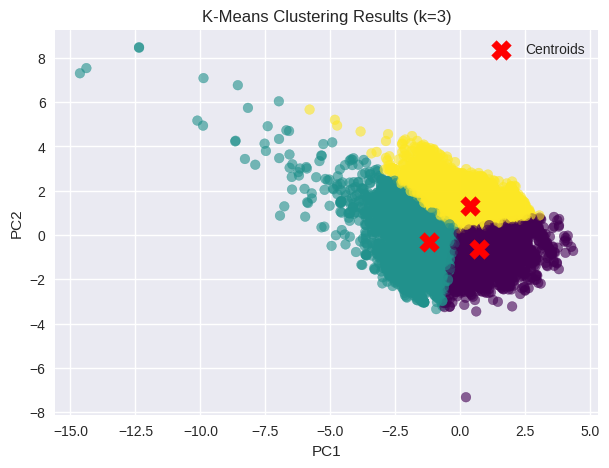

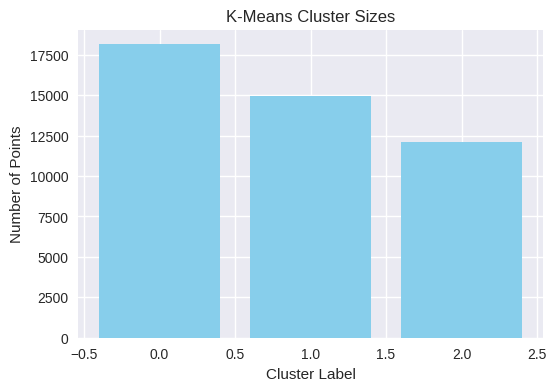

/tmp/ipython-input-1371676840.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=labels, y=silhouette_vals, palette='viridis')


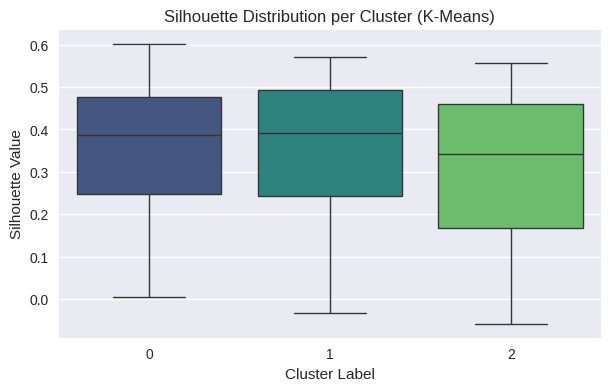


=== Clustering Evaluation ===
Inertia: 52565.33
Silhouette Score: 0.34


In [ ]:
# ==================== CLUSTERING EVALUATION ==================== #
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia)."""
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
        inertia += np.sum(distances ** 2)
    return inertia


def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters."""
    inertias = []
    K = range(1, max_k + 1)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(6, 4))
    plt.plot(K, inertias, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

    return inertias


def plot_silhouette_scores(X, max_k=10):
    """Plot silhouette scores for different cluster numbers."""
    silhouette_scores = []
    K = range(2, max_k + 1)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)

    plt.figure(figsize=(6, 4))
    plt.plot(K, silhouette_scores, marker='o')
    plt.title('Silhouette Score for Different k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

    return silhouette_scores


# ==================== RUN EVALUATION STEPS ==================== #

# (1) Elbow Method
inertias = plot_elbow_curve(X_pca)

# (2) Silhouette Scores
silhouette_scores = plot_silhouette_scores(X_pca)

# (3) Apply Final KMeans (choose k based on elbow and silhouette)
final_k = 3  # you can adjust this based on plots
kmeans = KMeans(n_clusters=final_k, random_state=42)
labels = kmeans.fit_predict(X_pca)

# (4) Clustering Results (Scatter + Centroids)
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering Results (k={final_k})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# (5) Cluster Size Bar Plot
unique, counts = np.unique(labels, return_counts=True)
plt.figure(figsize=(6, 4))
plt.bar(unique, counts, color='skyblue')
plt.title('K-Means Cluster Sizes')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.show()

# (6) Silhouette Distribution per Cluster
silhouette_vals = silhouette_samples(X_pca, labels)
plt.figure(figsize=(7, 4))
sns.boxplot(x=labels, y=silhouette_vals, palette='viridis')
plt.title('Silhouette Distribution per Cluster (K-Means)')
plt.xlabel('Cluster Label')
plt.ylabel('Silhouette Value')
plt.show()

# (7) Print Evaluation Metrics
inertia = kmeans.inertia_
silhouette = silhouette_score(X_pca, labels)

print("\n=== Clustering Evaluation ===")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [ ]:
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        # Start with all points in one cluster labeled 0
        n_samples = X.shape[0]
        labels = np.zeros(n_samples, dtype=int)

        current_clusters = {0: X}  # mapping of cluster_id -> points in that cluster
        next_label_id = 1  # counter for assigning new labels

        # Keep splitting until desired number of clusters reached
        while len(current_clusters) < self.n_clusters:
            # Select the largest cluster to split
            cluster_to_split = max(current_clusters.keys(), key=lambda k: len(current_clusters[k]))
            cluster_points = current_clusters[cluster_to_split]

            # Run binary KMeans on the selected cluster
            km = KMeans(n_clusters=2, random_state=self.random_state)
            sub_labels = km.fit_predict(cluster_points)

            # Assign one subcluster to keep original label, other gets new label
            left_mask = sub_labels == 0
            right_mask = sub_labels == 1
            new_label = next_label_id
            next_label_id += 1

            # Update labels in global array
            global_mask = labels == cluster_to_split
            labels[global_mask][left_mask] = cluster_to_split
            labels[global_mask][right_mask] = new_label

            # Record split info
            self.split_tree[cluster_to_split] = (cluster_to_split, new_label)
            self.centers_[cluster_to_split] = km.cluster_centers_[0]
            self.centers_[new_label] = km.cluster_centers_[1]

            # Update current clusters
            del current_clusters[cluster_to_split]
            current_clusters[cluster_to_split] = cluster_points[left_mask]
            current_clusters[new_label] = cluster_points[right_mask]

        self.labels_ = labels
        return self.labels_


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!